In [36]:
import keras
print(keras.__version__)

2.3.1


### 使用MLP模型实现手写数字图像MNIST的分类

In [37]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential, Model
from keras.utils import to_categorical

#### 初始化一个顺序模型(Sequential)

In [38]:
model = Sequential()

### 构建网络 

#### input_layer:784个输入，hideen_layer:784神经元，out_put:10个输出，active_function:relu

In [39]:
model.add(Dense(units=784, activation='relu', input_dim=784))

#### 为model加入10个输出的输出层，激活函数使用softmax

In [40]:
model.add(Dense(units=10, activation='softmax'))

In [41]:
#通过.summary()查看模型参数情况
#model.summary()

#### 使用.compile() 来配置学习过程，代价函数loss使用categorical_crossentropy，优化算法optimizer使用sgd，性能的指标使用accuracy

In [42]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### 训练

In [43]:
# 读入数据
f = np.load('./data/mnist.npz')
x_train, y_train = f['x_train'], f['y_train']
x_test, y_test = f['x_test'], f['y_test']  
f.close() 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


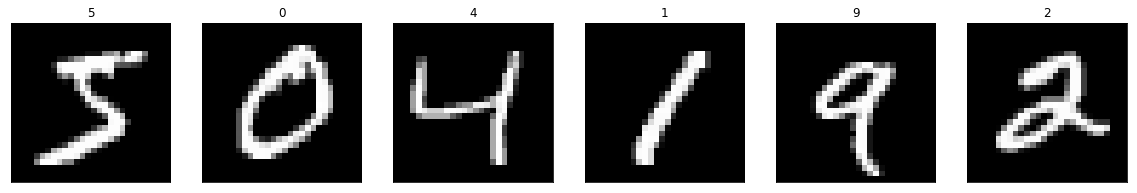

In [44]:
# 可视化查看数据
fig = plt.figure(figsize = (20, 20))
for i in range(6):
    ax = fig.add_subplot(1, 6,i + 1, xticks = [], yticks = [])
    ax.imshow(x_train[i], cmap = 'gray')
    ax.set_title(str(y_train[i]))

In [45]:
# 归一化
x_train=x_train / 255
x_test=x_test / 255

x_train=x_train.reshape(-1,784)
x_test=x_test.reshape(-1,784)

In [46]:
# 将y值进行one-hot编码
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [47]:
# 将数据送入模型训练
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 16s 262us/step - loss: 0.5969 - accuracy: 0.8572
Epoch 2/5
60000/60000 [==============================] - 17s 283us/step - loss: 0.3182 - accuracy: 0.9118
Epoch 3/5
60000/60000 [==============================] - 17s 291us/step - loss: 0.2702 - accuracy: 0.9250
Epoch 4/5
60000/60000 [==============================] - 18s 293us/step - loss: 0.2396 - accuracy: 0.9338
Epoch 5/5
60000/60000 [==============================] - 18s 293us/step - loss: 0.2163 - accuracy: 0.9398


In [48]:
# 评估模型性能
score,accu = model.evaluate(x_test, y_test, batch_size=128)
print("loss:",score)
print("accu:",accu)

10000/10000 [==============================] - 0s 39us/step
loss: 0.20096118432283402
accu: 0.9434000253677368


### 预测

In [49]:
model.predict_classes(x_test, batch_size=128)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)